# Using LSTM Neural Networks to Predict the Price of Apple Shares (033666)

In [46]:
# Necessary Imports

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Constants

EPOCH_NUMBER = 500   # Number of epochs for training the LSTM
BATCH_SIZE = 128      # Batch size for training the LSTM

In [47]:
# Import Apple historical data
df = pd.read_csv("AAPL.csv")
print("Number of rows and columns: ", df.shape)
df.head(5)

Number of rows and columns:  (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-12,29.065001,29.205000,28.912500,28.930000,26.585155,130102400
1,2015-11-13,28.799999,28.892500,28.067499,28.084999,25.808641,183249600
2,2015-11-16,27.844999,28.559999,27.750000,28.545000,26.231359,152426800
3,2015-11-17,28.730000,28.762501,28.330000,28.422501,26.118788,110467600
4,2015-11-18,28.940001,29.372499,28.875000,29.322500,26.945841,186698800


In [48]:
def root_mean_squared_error(y_actual, y_pred):
    # Function for calculating RMSE
    return K.sqrt(K.mean(K.square(y_pred - y_actual)))

In [49]:
# Split data into training and testing set
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [50]:
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create structure with 60 time-steps and 1 output
X_train = []
Y_train = []

for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [51]:
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile RNN
model.compile(optimizer='adam', loss=root_mean_squared_error)

# Fit to training set
model.fit(X_train, Y_train, epochs=EPOCH_NUMBER, batch_size=BATCH_SIZE)

Epoch 1/500
6/6 [==============================] - 1s 105ms/step - loss: 0.3164
Epoch 2/500
6/6 [==============================] - 1s 98ms/step - loss: 0.1529
Epoch 3/500
6/6 [==============================] - 1s 100ms/step - loss: 0.1209
Epoch 4/500
6/6 [==============================] - 1s 101ms/step - loss: 0.0996
Epoch 5/500
6/6 [==============================] - 1s 121ms/step - loss: 0.0832
Epoch 6/500
6/6 [==============================] - 1s 100ms/step - loss: 0.0842
Epoch 7/500
6/6 [==============================] - 1s 100ms/step - loss: 0.0781
Epoch 8/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0782
Epoch 9/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0802
Epoch 10/500
6/6 [==============================] - 1s 104ms/step - loss: 0.0743
Epoch 11/500
6/6 [==============================] - 1s 101ms/step - loss: 0.0818
Epoch 12/500
6/6 [==============================] - 1s 100ms/step - loss: 0.0795
Epoch 13/500
6/6 [======================

6/6 [==============================] - 1s 97ms/step - loss: 0.0474
Epoch 104/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0440
Epoch 105/500
6/6 [==============================] - 1s 107ms/step - loss: 0.0478
Epoch 106/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0467
Epoch 107/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0460
Epoch 108/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0463
Epoch 109/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0475
Epoch 110/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0456
Epoch 111/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0470
Epoch 112/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0493
Epoch 113/500
6/6 [==============================] - 1s 97ms/step - loss: 0.0486
Epoch 114/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0493
Epoch 115/500
6/6 [======================

6/6 [==============================] - 1s 97ms/step - loss: 0.0404
Epoch 205/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0385
Epoch 206/500
6/6 [==============================] - 1s 106ms/step - loss: 0.0368
Epoch 207/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0382
Epoch 208/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0367
Epoch 209/500
6/6 [==============================] - 1s 97ms/step - loss: 0.0383
Epoch 210/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0376
Epoch 211/500
6/6 [==============================] - 1s 100ms/step - loss: 0.0392
Epoch 212/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0388
Epoch 213/500
6/6 [==============================] - 1s 97ms/step - loss: 0.0388
Epoch 214/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0388
Epoch 215/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0365
Epoch 216/500
6/6 [=====================

6/6 [==============================] - 1s 97ms/step - loss: 0.0350
Epoch 405/500
6/6 [==============================] - 1s 100ms/step - loss: 0.0340
Epoch 406/500
6/6 [==============================] - 1s 100ms/step - loss: 0.0306
Epoch 407/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0309
Epoch 408/500
6/6 [==============================] - 1s 100ms/step - loss: 0.0316
Epoch 409/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0311
Epoch 410/500
6/6 [==============================] - 1s 96ms/step - loss: 0.0338
Epoch 411/500
6/6 [==============================] - 1s 102ms/step - loss: 0.0315
Epoch 412/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0315
Epoch 413/500
6/6 [==============================] - 1s 101ms/step - loss: 0.0301
Epoch 414/500
6/6 [==============================] - 1s 101ms/step - loss: 0.0330
Epoch 415/500
6/6 [==============================] - 1s 97ms/step - loss: 0.0315
Epoch 416/500
6/6 [=================

In [52]:
# Get predicted price 2017
ds_train = df.iloc[:800, 1:2]
ds_test = df.iloc[800:, 1:2]

ds_total = pd.concat((ds_train, ds_test), axis=0)

# Scale and reshape data
inputs = ds_total[len(ds_total) - len(ds_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Get test inputs
X_test = []

for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(459, 60, 1)


In [53]:
# Make predictions
predicted_stock_price = model.predict(X_test)

# Transform back through inverse scalar
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(K.get_value(root_mean_squared_error(ds_test.values, predicted_stock_price)))

14.584728510805471


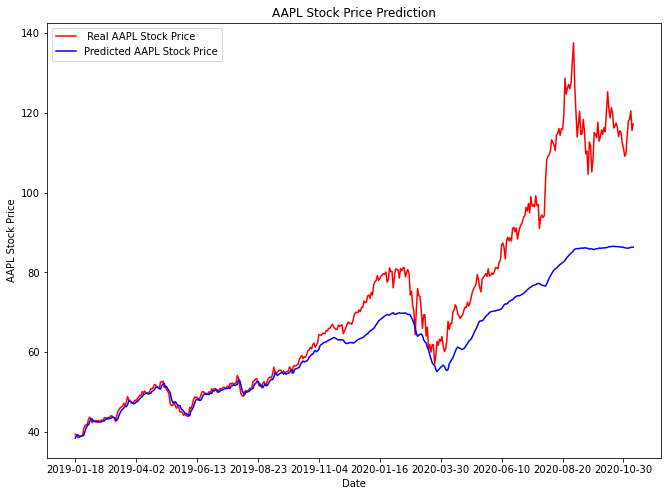

In [54]:
# Data visualization
plt.plot(df.loc[800:, 'Date'], ds_test.values, color='red', label=' Real AAPL Stock Price')
plt.plot(df.loc[800:, 'Date'], predicted_stock_price, color='blue', label='Predicted AAPL Stock Price')

plt.xticks(np.arange(0,459,50))
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('AAPL Stock Price')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(11, 8)
plt.show()